# Experimentando classificação com diferentes tipos de preprocessamento no calculo do LBP

* com diferentes quantidades de pontos para o cálculo do LBP (4 e 8);
  * com diferentes formas de "Binarizar" com OTSU antes de ir para o LBP:
    * maior: pixel com valor maior que o threshold se torna 1;
    * menor: pixel com valor menor que o threshold se torna 0;
    * ambos;

## Importando bibliotecas

In [1]:
# import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.metrics import plot_confusion_matrix

TARGET_NAMES = {'normal': 0,
                'broca':1,
                'fissura': 2,
                'musgo': 3}

seeds: [ 111 4974 6944 6273 5773 2763 1565 5330 1761   21 1085 2708 4334 1837
 2246 2437  751 5283 3465   70 5104 1621 4978 3837 3182 1350 1963 5791
 1275 6706]
           ambos      menor      maior
count  30.000000  30.000000  30.000000
mean    0.435494   0.529012   0.483333
std     0.035278   0.043207   0.062959
min     0.361111   0.453704   0.370370
25%     0.407407   0.481481   0.444444
50%     0.439815   0.541667   0.481481
75%     0.460648   0.564815   0.527778
max     0.518519   0.592593   0.638889


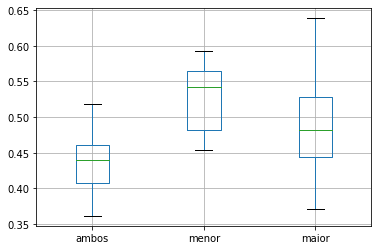

ambos,menor,maior
0.416667,0.481481,0.453704
0.453704,0.564815,0.546296
0.435185,0.564815,0.518519
0.388889,0.472222,0.527778
0.481481,0.583333,0.453704
0.407407,0.481481,0.509259
0.518519,0.546296,0.601852
0.425926,0.546296,0.490741
0.462963,0.472222,0.546296
0.453704,0.453704,0.407407


In [2]:
f_list = ['ambos', 'menor', 'maior']
X_list = []
for name in f_list:
  data = pd.read_csv(f'./csvs/prepro_5-{name}-P8.csv') # .dropna()
  target = data.pop('target').values

  X_list.append((data.values, target))

acuracias = []

# Gerando 30 sementes "aleatórias" dentro do intervalo [0, 8000)
seed_arr = np.random.randint(8000, size=30)

print(f'seeds: {seed_arr}')
for rodada, seed in enumerate(seed_arr):
  # print(f'Rodada {rodada}\t-\tSeed {seed}')

  acc = [0, 0, 0]
  
  # fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
  for i, (X, y) in enumerate(X_list):
    # separando dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Instanciando classificador com padronizador
    clf = make_pipeline(StandardScaler(),
                        SVC(gamma='auto', cache_size=600)
                      ).fit(X_train, y_train)

    acc[i] = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)

    # print(
    #   f'para {f_list[i]}\n',
    # classification_report(
    #   y_true=y_test,
    #   y_pred=y_pred,
    #   target_names=TARGET_NAMES)
    # )

  #   ax[i].title.set_text(f_list[i])
  #   plot_confusion_matrix(
  #     estimator=clf,
  #     X=X_test,
  #     y_true=y_test,
  #     display_labels=TARGET_NAMES,
  #     xticks_rotation=30,
  #     normalize='true',
  #     ax=ax[i])

  # plt.show()
  acuracias.append(acc)

acc_df = pd.DataFrame(data=acuracias, columns=f_list)

print(acc_df.describe())

acc_df.boxplot()
plt.show()
acc_df.style.hide_index().background_gradient(cmap='Blues')

           ambos      menor      maior
count  30.000000  30.000000  30.000000
mean    0.429938   0.468827   0.438889
std     0.034188   0.042430   0.057624
min     0.370370   0.388889   0.305556
25%     0.400463   0.437500   0.407407
50%     0.425926   0.467593   0.444444
75%     0.458333   0.500000   0.472222
max     0.500000   0.555556   0.564815


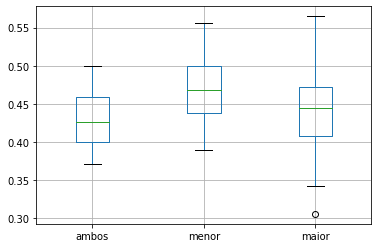

ambos,menor,maior
0.425926,0.481481,0.462963
0.398148,0.509259,0.472222
0.435185,0.5,0.509259
0.388889,0.444444,0.5
0.435185,0.416667,0.453704
0.398148,0.490741,0.453704
0.490741,0.555556,0.527778
0.444444,0.416667,0.435185
0.407407,0.398148,0.472222
0.425926,0.416667,0.37963


In [3]:
f_list = ['ambos', 'menor', 'maior']
X_list = []
for name in f_list:
  data = pd.read_csv(f'./csvs/prepro_5-{name}-P4.csv') # .dropna()
  target = data.pop('target').values
    # Apenas as primeiras 16 colunas apresentam dados com 4 pontos
  X_list.append((data.values[:, :16], target))

acuracias = []

for rodada, seed in enumerate(seed_arr):
  acc = [0, 0, 0]
  
  for i, (X, y) in enumerate(X_list):
    # separando dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Instanciando classificador com padronizador
    clf = make_pipeline(StandardScaler(),
                        SVC(gamma='auto', cache_size=600)
                      ).fit(X_train, y_train)

    acc[i] = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
  acuracias.append(acc)

acc_df = pd.DataFrame(data=acuracias, columns=f_list)

print(acc_df.describe())

acc_df.boxplot()
plt.show()
acc_df.style.hide_index().background_gradient(cmap='Blues')